## Moving Average (MA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv(r"Downloads\Index2018.csv")
df_copy = df.copy()
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = True)
df_copy.set_index('date', inplace = True)
df_copy = df_copy.asfreq('b')
df_copy = df_copy.fillna(method = 'ffill')
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [3]:
df_copy['market_val'] = df_copy.ftse

In [4]:
df_copy = df_copy.drop(['spx','dax', 'ftse', 'nikkei'], axis = 1)
df_copy.head()

,market_val
date,
1994-01-07,3445.98
1994-01-10,3440.58
1994-01-11,3413.77
1994-01-12,3372.02
1994-01-13,3360.01


## Creating Returns

In [5]:
df_copy['returns'] = df_copy.market_val.pct_change(1).mul(100)

## ACF Plot

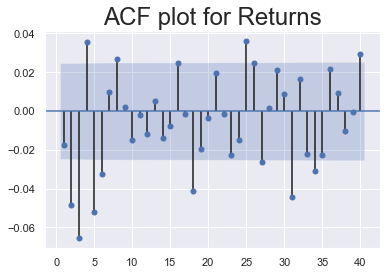

In [6]:
sgt.plot_acf(df_copy.returns[1:], zero = False, lags = 40)
plt.title("ACF plot for Returns", size = 24);

## MA(1) for Returns

In [7]:
model_ret_ma_1 = ARMA(df_copy.returns[1:], order = (0,1))
results_ma_1 = model_ret_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 1)   Log Likelihood               -9597.598
Method:                       css-mle   S.D. of innovations              1.117
Date:                Mon, 19 Oct 2020   AIC                          19201.195
Time:                        11:23:41   BIC                          19221.429
Sample:                    01-10-1994   HQIC                         19208.206
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.374      0.169      -0.008       0.046
ma.L1.returns    -0.0196      0.013     -1.467      0.142      -0.046       0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           51.1298           +0.0000j           51.1298            0.0000
-----------------------------------------------------------------------------
"""

## LLR Test

In [8]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## Higher Order MA models

In [9]:
model_ret_ma_2 = ARMA(df_copy.returns[1:], order = (0,2))
results_ma_2 = model_ret_ma_2.fit()
print(results_ma_2.summary())
print("LLR_test result: \n p_val = " +str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 2)   Log Likelihood               -9589.839
Method:                       css-mle   S.D. of innovations              1.115
Date:                Mon, 19 Oct 2020   AIC                          19187.677
Time:                        11:23:42   BIC                          19214.655
Sample:                    01-10-1994   HQIC                         19197.025
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.457      0.145      -0.007       0.045
ma.L1.returns    -0.0254      0.013     -2.000      0.045      -0.050      -0.001
ma.L2.returns    -0.0488      0.012     

In [10]:
model_ret_ma_3 = ARMA(df_copy.returns[1:], order = (0,3))
results_ma_3 = model_ret_ma_3.fit()
print(results_ma_3.summary())
print("LLR_test result: \n p_val = " +str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 3)   Log Likelihood               -9573.494
Method:                       css-mle   S.D. of innovations              1.112
Date:                Mon, 19 Oct 2020   AIC                          19156.988
Time:                        11:23:43   BIC                          19190.710
Sample:                    01-10-1994   HQIC                         19168.672
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.587      0.113      -0.004       0.043
ma.L1.returns    -0.0175      0.013     -1.381      0.167      -0.042       0.007
ma.L2.returns    -0.0539      0.012     

In [11]:
model_ret_ma_4 = ARMA(df_copy.returns[1:], order = (0,4))
results_ma_4 = model_ret_ma_3.fit()
print(results_ma_4.summary())
print("LLR_test result: \n p_val = " +str(LLR_test(model_ret_ma_3, model_ret_ma_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 3)   Log Likelihood               -9573.494
Method:                       css-mle   S.D. of innovations              1.112
Date:                Mon, 19 Oct 2020   AIC                          19156.988
Time:                        11:23:44   BIC                          19190.710
Sample:                    01-10-1994   HQIC                         19168.672
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.587      0.113      -0.004       0.043
ma.L1.returns    -0.0175      0.013     -1.381      0.167      -0.042       0.007
ma.L2.returns    -0.0539      0.012     

In [12]:
model_ret_ma_5 = ARMA(df_copy.returns[1:], order = (0,5))
results_ma_5 = model_ret_ma_5.fit()
print(results_ma_5.summary())
print("LLR_test result: \n p_val = " +str(LLR_test(model_ret_ma_4, model_ret_ma_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 5)   Log Likelihood               -9562.650
Method:                       css-mle   S.D. of innovations              1.110
Date:                Mon, 19 Oct 2020   AIC                          19139.300
Time:                        11:23:47   BIC                          19186.511
Sample:                    01-10-1994   HQIC                         19155.658
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.617      0.106      -0.004       0.042
ma.L1.returns    -0.0214      0.013     -1.691      0.091      -0.046       0.003
ma.L2.returns    -0.0494      0.013     

In [13]:
model_ret_ma_6 = ARMA(df_copy.returns[1:], order = (0,6))
results_ma_6 = model_ret_ma_6.fit()
print(results_ma_6.summary())
print("LLR_test result: \n p_val = " +str(LLR_test(model_ret_ma_5, model_ret_ma_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 6)   Log Likelihood               -9559.890
Method:                       css-mle   S.D. of innovations              1.110
Date:                Mon, 19 Oct 2020   AIC                          19135.779
Time:                        11:23:52   BIC                          19189.735
Sample:                    01-10-1994   HQIC                         19154.474
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.011      1.668      0.095      -0.003       0.041
ma.L1.returns    -0.0194      0.013     -1.542      0.123      -0.044       0.005
ma.L2.returns    -0.0487      0.013     

In [14]:
model_ret_ma_7 = ARMA(df_copy.returns[1:], order = (0,7))
results_ma_7 = model_ret_ma_7.fit()
print(results_ma_7.summary())
print("LLR_test result: \n p_val = " +str(LLR_test(model_ret_ma_6, model_ret_ma_7)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 7)   Log Likelihood               -9559.715
Method:                       css-mle   S.D. of innovations              1.110
Date:                Mon, 19 Oct 2020   AIC                          19137.430
Time:                        11:24:01   BIC                          19198.130
Sample:                    01-10-1994   HQIC                         19158.461
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.011      1.655      0.098      -0.004       0.042
ma.L1.returns    -0.0201      0.013     -1.586      0.113      -0.045       0.005
ma.L2.returns    -0.0490      0.013     

Here we can significant p_val for LLR_test thus we can say MA(6) model is better than MA(7).

In [15]:
model_ret_ma_8 = ARMA(df_copy.returns[1:], order = (0,8))
results_ma_8 = model_ret_ma_8.fit()
print(results_ma_8.summary())
print("LLR_test result: \n p_val = " +str(LLR_test(model_ret_ma_7, model_ret_ma_8)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 8)   Log Likelihood               -9557.611
Method:                       css-mle   S.D. of innovations              1.110
Date:                Mon, 19 Oct 2020   AIC                          19135.223
Time:                        11:24:13   BIC                          19202.668
Sample:                    01-10-1994   HQIC                         19158.591
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.609      0.108      -0.004       0.042
ma.L1.returns    -0.0197      0.013     -1.564      0.118      -0.044       0.005
ma.L2.returns    -0.0491      0.013     

In [16]:
print("LLR_test result: \n p_val = " +str(LLR_test(model_ret_ma_6, model_ret_ma_8, DF = 2)))

LLR_test result: 
 p_val = 0.102


Thus we can see that MA(6) is better than MA(8) as p_val>0.05

## Residuals

In [17]:
df_copy['res_price'] = model_ret_ma_6.fit().resid[1:]

In [18]:
round(df_copy.res_price.mean(), 3)

-0.0

In [19]:
round(df_copy.res_price.std(), 3)

1.11

In [20]:
sts.adfuller(df_copy.res_price[2:])

(-14.910034018831608,
 1.4631614114724546e-27,
 34,
 6240,
 {'1%': -3.4313983961705303,
  '5%': -2.8620032980054413,
  '10%': -2.567016610602605},
 19024.931570959707)

 These are stationary as tstat < ttab

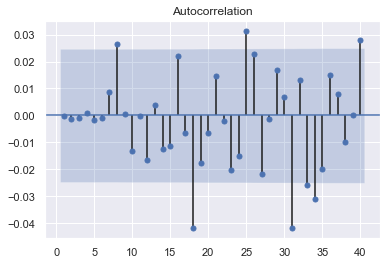

In [21]:
sgt.plot_acf(df_copy.res_price[2:], lags = 40, zero = False)
plt.show()

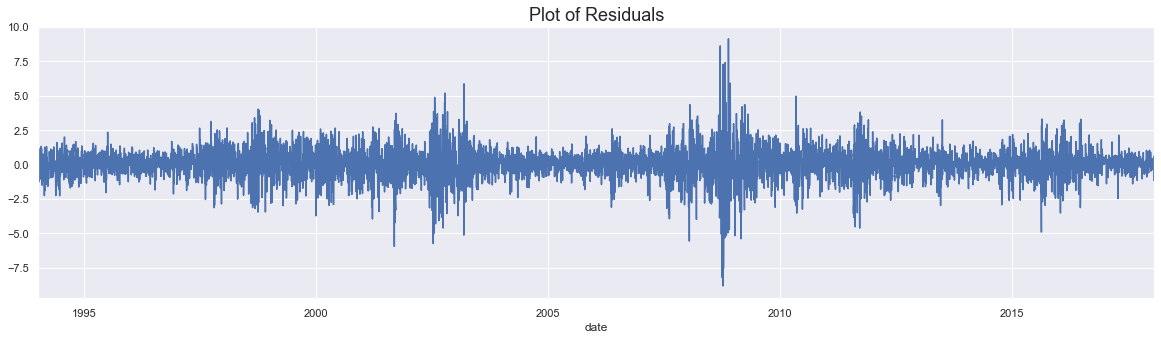

In [22]:
df_copy.res_price.plot(figsize = (20,5))
plt.title("Plot of Residuals", size = 18);

# For MA(8)

In [23]:
df_copy['res_price_8'] = model_ret_ma_8.fit().resid[1:]
print(round(df_copy.res_price_8.mean(), 3))
print(round(df_copy.res_price_8.std(), 3))

-0.0
1.11


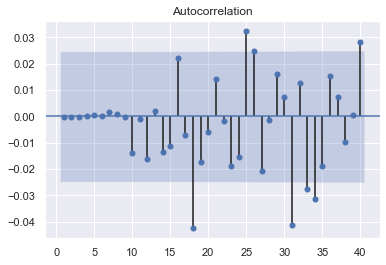

In [24]:
sgt.plot_acf(df_copy.res_price_8[2:], lags = 40, zero = False)
plt.show()

As we can see as comared to MA(6) , MA(8) does not have any significant lags till 18th thus we can say MA(6) is better than MA(8).

# Normalised Returns

In [25]:
bench_ret = df_copy.returns.iloc[1]
df_copy['norm_ret'] = df_copy.returns.div(bench_ret).mul(100)

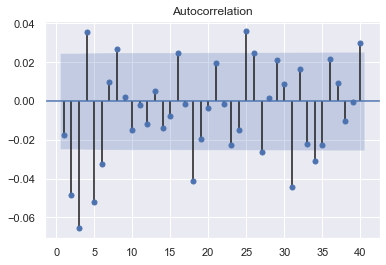

In [26]:
sgt.plot_acf(df_copy.norm_ret[2:], lags = 40, zero = False)
plt.show()

In [27]:
# Fitting models for Normalised returns (MA(8))
model_norm_ret_8 = ARMA(df_copy.norm_ret[1:], order = (0,8))
results_norm_8 = model_norm_ret_8.fit()
results_norm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 6276
Model:                     ARMA(0, 8)   Log Likelihood              -50091.563
Method:                       css-mle   S.D. of innovations            708.043
Date:                Mon, 19 Oct 2020   AIC                         100203.127
Time:                        11:24:47   BIC                         100270.571
Sample:                    01-10-1994   HQIC                        100226.495
                         - 01-29-2018                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.1199      7.547     -1.606      0.108     -26.911       2.672
ma.L1.norm_ret    -0.0197      0.013     -1.564      0.118      -0.044       0.005
ma.L2.norm_ret    -0.0491      0.013     -3.896      0.000      -0.074      -0.024
ma.L3.norm_ret    -0.0694      0.013     -5.488      0.000      -0.094      -0.045
ma.L4.norm_ret     0.0329      0.013      2.598      0.009       0.008       0.058
ma.L5.norm_ret    -0.0523      0.013     -4.090      0.000      -0.077      -0.027
ma.L6.norm_ret    -0.0311      0.013     -2.412      0.016      -0.056      -0.006
ma.L7.norm_ret     0.0076      0.013      0.597      0.551      -0.017       0.033
ma.L8.norm_ret     0.0255      0.012      2.052      0.040       0.001       0.050
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.5487           -0.4196j            1.6045           -0.0421
MA.2            1.5487           +0.4196j            1.6045            0.0421
MA.3            0.5993           -1.3679j            1.4934           -0.1843
MA.4            0.5993           +1.3679j            1.4934            0.1843
MA.5           -0.7874           -1.3439j            1.5576           -0.3344
MA.6           -0.7874           +1.3439j            1.5576            0.3344
MA.7           -1.5101           -0.7333j            1.6787           -0.4280
MA.8           -1.5101           +0.7333j            1.6787            0.4280
-----------------------------------------------------------------------------
"""

which resemble the non-normalised returns and hence we conclude it doesn't affect the final output.

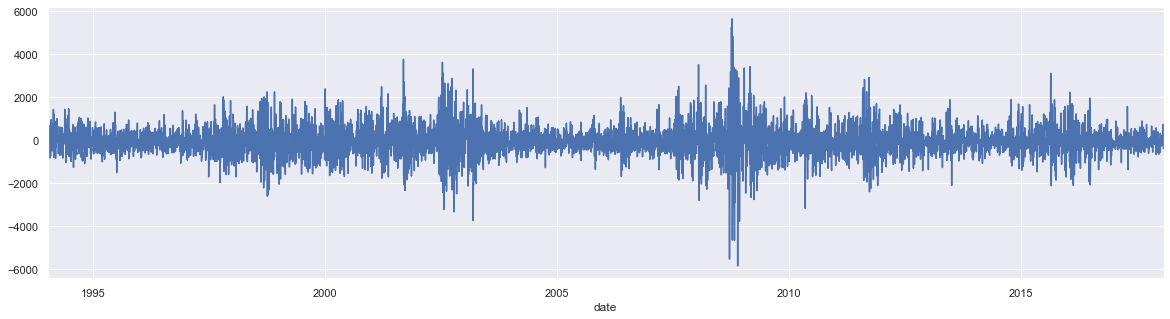

In [28]:
model_norm_ret_8.fit().resid[1:].plot(figsize = (20,5))
plt.show()

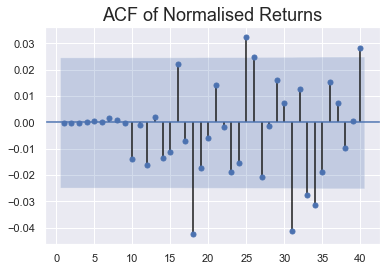

In [29]:
df_copy['res_8']= model_norm_ret_8.fit().resid[1:]
sgt.plot_acf(df_copy.res_8[2:], lags = 40, zero = False)
plt.title('ACF of Normalised Returns', size = 18)
plt.show()

## MA models for Prices

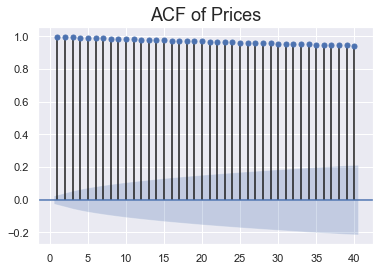

In [30]:
sgt.plot_acf(df_copy.market_val[2:], lags = 40, zero = False)
plt.title('ACF of Prices', size = 18)
plt.show()

In [31]:
model_market_val_ma_1 = ARMA(df_copy.market_val, order = (0,1))
results_ma_1 = model_market_val_ma_1.fit()
print(results_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:             market_val   No. Observations:                 6277
Model:                     ARMA(0, 1)   Log Likelihood              -48997.927
Method:                       css-mle   S.D. of innovations            593.951
Date:                Mon, 19 Oct 2020   AIC                          98001.855
Time:                        11:25:02   BIC                          98022.089
Sample:                    01-07-1994   HQIC                         98008.866
                         - 01-29-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5423.6157     14.722    368.404      0.000    5394.761    5452.470
ma.L1.market_val     0.9639      0.002    411.573      0.000       0.959       0.969
                            

In [32]:
model_price_ma_6 = ARMA(df_copy.market_val, order = (0,6))
results_ma_price_6 = model_price_ma_6.fit()
print(results_ma_price_6.summary())

                              ARMA Model Results                              
Dep. Variable:             market_val   No. Observations:                 6277
Model:                     ARMA(0, 6)   Log Likelihood              -39378.885
Method:                       css-mle   S.D. of innovations            128.261
Date:                Mon, 19 Oct 2020   AIC                          78773.770
Time:                        11:25:05   BIC                          78827.727
Sample:                    01-07-1994   HQIC                         78792.465
                         - 01-29-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5423.7268     20.523    264.276      0.000    5383.503    5463.951
ma.L1.market_val     1.9836      0.013    157.592      0.000       1.959       2.008
ma.L2.market_val     2.6987 

In [33]:
model_price_ma_8 = ARMA(df_copy.market_val, order = (0,8))
results_ma_price_8 = model_price_ma_8.fit()
print(results_ma_price_8.summary())

                              ARMA Model Results                              
Dep. Variable:             market_val   No. Observations:                 6277
Model:                     ARMA(0, 8)   Log Likelihood              -38143.387
Method:                       css-mle   S.D. of innovations            105.343
Date:                Mon, 19 Oct 2020   AIC                          76306.774
Time:                        11:26:08   BIC                          76374.220
Sample:                    01-07-1994   HQIC                         76330.143
                         - 01-29-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5423.8498     23.112    234.674      0.000    5378.550    5469.149
ma.L1.market_val     1.8460      0.014    131.116      0.000       1.818       1.874
ma.L2.market_val     2.5927 

LLR_test result: 
 p_val = 0.0
